In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importation du jeu de données et nettoyage

On importe le jeu de données : <br>https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

La définition des variables (colonnes) est ici : <br> https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [2]:
df_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [3]:
df_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [4]:
# On lit le nombre de colonnes du jeu de données:
def nbr_columns(data):
    return len(data.columns)

# On lit le nombre de lignes du jeu de données:
def nbr_rows(data):
    return len(data.index)

# On lit le nombre de Not a Number du jeu de données:
def NaN_count(data):
    return data.isna().sum().sum()

# On lit le pourcentage de Not a Number du jeu de données:
def NaN_percent(data):
    return data.isna().sum().sum()/data.size

# On calcule le nombre de colonnes qui sont en doublon dans le jeu de données:
def duplicate_columns_count(data):
    return len(data.columns.values.tolist())-len(data.columns.unique())

# On calcule le nombre de lignes qui sont en doublon dans le jeu de données:
def duplicate_rows_count(data):
    return len(data)-len(data.drop_duplicates())

# On calcule le pourcentage de lignes qui sont en doublon dans le jeu de données:
def duplicate_rows_percent(data):
    return duplicate_rows_count(data)/nbr_rows(data)

# On créé une fonction qui affiche les statistiques ci-dessus du jeu de données d'entrée:
def dataset_overview(data):
    print('Nombre de colonnes : {}'.format(nbr_columns(data)))
    print('Nombre de lignes : {}'.format(nbr_rows(data)))
    print('Nombre de NaN : {}'.format(NaN_count(data)))
    print('Pourcentage de NaN (%) : {:.2%}'.format(NaN_percent(data)))
    print('Nombre de colonnes en doublon : {}'.format(duplicate_columns_count(data)))      
    print('Nombre de lignes en doublon : {}'.format(duplicate_rows_count(data)))
    print('Pourcentage de lignes en doublon (%) : {:.2%}'.format(duplicate_rows_percent(data)))
    return None

In [5]:
dataset_overview(df_2015)

Nombre de colonnes : 47
Nombre de lignes : 3340
Nombre de NaN : 26512
Pourcentage de NaN (%) : 16.89%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [6]:
dataset_overview(df_2016)

Nombre de colonnes : 46
Nombre de lignes : 3376
Nombre de NaN : 19952
Pourcentage de NaN (%) : 12.85%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [7]:
pd.get_option("display.max_columns", None)

20

In [8]:
pd.options.display.max_columns = df_2015.shape[1]
df_2015.describe(include = 'all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340,3340,3340,3338,3340,3340.000000,3340,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3213,3204,3.204000e+03,1559,1559.000000,560,560.000000,110,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,3339,13,3340,84,224.000000,3338.000000,213.000000,3338.000000,3340.000000
unique,NaN,NaN,7,27,3287,3245,3298,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,442,56,NaN,47,NaN,41,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,13,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,WAREHOUSE,2400002,"{'latitude': '47.52593209', 'longitude': '-122...",NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Under construction starting 6/2013 (old buildi...,Compliant,High Outlier,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1461,998,9,5,5,NaN,578,NaN,NaN,NaN,NaN,NaN,NaN,862,1598,NaN,881,NaN,107,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2791,1,3337,46,NaN,NaN,NaN,NaN,NaN
mean,20522.168263,2015.0,NaN,NaN,NaN,NaN,NaN,4.450898,NaN,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,NaN,NaN,7.488154e+04,NaN,27675.646568,NaN,10755.708929,NaN,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,NaN,NaN,NaN,NaN,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,NaN,NaN,NaN,NaN,NaN,2.127203,NaN,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,NaN,NaN,1.236249e+05,NaN,52480.843425,NaN,22618.529737,NaN,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,NaN,NaN,NaN,NaN,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,NaN,NaN,5.872000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,NaN,NaN,2.500000e+04,NaN,4959.000000,NaN,2385.250000,NaN,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,NaN,NaN,NaN,NaN,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,NaN,NaN,3.900000e+04,NaN,10600.000000,NaN,5

Sur le jeu de données 2015 ci-dessus, on voit des valeurs de minimum négatives dans les colonnes PropertyGFAParking et PropertyGFABuilding(s) (qui représentent des surfaces donc nécessairement positives ou nulle) : il faudra les éliminer.

In [9]:
pd.options.display.max_columns = df_2016.shape[1]
df_2016.describe(include = 'all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,3376.000000,3376,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3367,3356,3.356000e+03,1679,1679.000000,596,596.000000,119,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466,56,NaN,50,NaN,44,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2203 Airport Way S,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,NaN,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,1667,NaN,976,NaN,110,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,4.439277,NaN,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,NaN,NaN,7.917764e+04,NaN,28444.075817,NaN,11738.675166,NaN,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,2.120625,NaN,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,NaN,NaN,2.017034e+05,NaN,54392.917928,NaN,29331.199286,NaN,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,5.656000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,3.000000,NaN,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,NaN,NaN,2.509475e+04,NaN,5000.000000,NaN,2239.000000,NaN,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,4.000000,NaN,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,NaN,NaN,3.989400e+04,NaN,10664.000000,NaN,5043.000000,NaN,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,7.000000,NaN,47.65711

Sur le jeu de données 2016 ci-dessus, les valeurs minimum de surface sont bien positives donc c'est cohérent.

In [10]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,...,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,...,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,...,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,...,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,...,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,...,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [11]:
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


On créé une liste des variables présentes dans le jeu de données de 2015 mais absentes de celui de 2016 :

In [12]:
list(set(df_2015.columns.tolist()) -  set(df_2016.columns.tolist()))

['GHGEmissions(MetricTonsCO2e)',
 'Comment',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'City Council Districts',
 'OtherFuelUse(kBtu)',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes',
 'SPD Beats',
 'Location']

On créé une liste des variables présentes dans le jeu de données de 2016 mais absentes de celui de 2015 :

In [13]:
list(set(df_2016.columns.tolist()) -  set(df_2015.columns.tolist()))

['Longitude',
 'TotalGHGEmissions',
 'ZipCode',
 'Latitude',
 'State',
 'Address',
 'City',
 'GHGEmissionsIntensity',
 'Comments']

In [14]:
df_2015.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Location',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'DefaultData',
 'Comment',
 'ComplianceStatus',
 'Outlier',
 '2010 Census Tracts',

In [15]:
df_2016.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

On constate que des variables ont des noms similaires mais pas identique donc on devra les uniformiser pour regrouper ces deux jeux de données. <br>
Exemples : <br>
1. le montant total des gaz à effet de serre <br>
    - 2015 : GHGEmissions(MetricTonsCO2e)<br>
    - 2016 : TotalGHGEmissions <br><br>
2. le taux de gaz à effet de serre <br>
    - 2015 : GHGEmissionsIntensity(kgCO2e/ft2)<br>
    - 2016 : GHGEmissionsIntensity <br>
3. le code postal <br>
    - 2015 : Zip Codes<br>
    - 2016 : ZipCode<br>


In [16]:
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)" : "TotalGHGEmissions", "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity", "Zip Codes":"ZipCode"}, inplace=True)

On regarde le pourcentage de NaN (par rappport à une colonne) pour chaque colonne du jeu de données de 2015 :

In [17]:
100 * (df_2015.isna().sum()/len(df_2015))

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.059880
Location                                                          0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
NumberofBuildings                                                 0.000000
NumberofFloors                                                    0.239521
PropertyGFATotal                                                  0.000000
PropertyGFAParking       

Pour le jeu de données de 2015, les colonnes qui ne seront pas utiles pour la prédiction de l'énergie ou du CO2 sont: <br>
1. YearsENERGYSTARCertified <br>
2. Comment <br>
3. PropertyName (on peut utiliser OSEBuildingID pour identifier un bâtiment) <br>
4. Seattle Police Department Micro Community Policing Plan Areas (absent du jeu de données 2016) <br>
5. City Council Districts(absent du jeu de données 2016)<br>
6. 2010 Census Tracts (absent du jeu de données 2016)<br>
7. Location (absent du jeu de données 2016) <br>
8. SPD Beats (absent du jeu de données 2016)<br>
9. OtherFuelUse(kBtu) (absent du jeu de données 2016)<br>


In [18]:
df_2015.drop('YearsENERGYSTARCertified', inplace=True, axis=1)

In [19]:
df_2015.drop('Comment', inplace=True, axis=1)

In [20]:
df_2015.drop('PropertyName', inplace=True, axis=1)

In [21]:
df_2015.drop('Seattle Police Department Micro Community Policing Plan Areas', inplace=True, axis=1)

In [22]:
df_2015.drop('City Council Districts', inplace=True, axis=1)

In [23]:
df_2015.drop('2010 Census Tracts', inplace=True, axis=1)

In [24]:
df_2015.drop('Location', inplace=True, axis=1)

In [25]:
df_2015.drop('SPD Beats', inplace=True, axis=1)

In [26]:
df_2015.drop('OtherFuelUse(kBtu)', inplace=True, axis=1)

On regarde le pourcentage de NaN pour chaque colonne du jeu de données de 2016:

In [27]:
100 * df_2016.isna().sum()/(len(df_2016))

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

Pour le jeu de données de 2016, les colonnes qui ne seront pas utiles pour la prédiction de l'énergie ou du CO2 sont: <br>
1. Address <br>
2. City (on sait déjà que la ville est Seattle)<br>
3. Comments<br>
4. Longitude<br>
5. Latitude<br>
6. State<br>
7. PropertyName<br>
8. YearsENERGYSTARCertified<br>

In [28]:
df_2016.drop('Address', inplace=True, axis=1)

In [29]:
df_2016.drop('City', inplace=True, axis=1)

In [30]:
df_2016.drop('Comments', inplace=True, axis=1)

In [31]:
df_2016.drop('Longitude', inplace=True, axis=1)

In [32]:
df_2016.drop('Latitude', inplace=True, axis=1)

In [33]:
df_2016.drop('State', inplace=True, axis=1)

In [34]:
df_2016.drop('PropertyName', inplace=True, axis=1)

In [35]:
df_2016.drop('YearsENERGYSTARCertified', inplace=True, axis=1)

In [36]:
list(set(df_2015.columns.tolist()) -  set(df_2016.columns.tolist()))

[]

In [37]:
list(set(df_2016.columns.tolist()) -  set(df_2015.columns.tolist()))

[]

On a donc bien vérifié que les deux jeux de données on bien les mêmes colonnes.

On va maintenant ordonner les colonnes par ordre alphabétique pour les deux jeu de données de 2015 et 2016 :

In [38]:
df_2015 = df_2015.reindex(sorted(df_2015.columns), axis=1)

In [39]:
df_2016 = df_2016.reindex(sorted(df_2016.columns), axis=1)

In [40]:
pd.options.display.max_columns = df_2015.shape[1]
df_2015.head()

,BuildingType,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),Neighborhood,NumberofBuildings,NumberofFloors,OSEBuildingID,Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode
0,NonResidential,Compliant,7,2015,No,65.0,3686160.0,1080307.0,2.64,Hotel,88434.0,Hotel,1272388.0,12724.0,DOWNTOWN,1,12.0,1,NaN,Hotel,88434,0,88434,NaN,NaN,78.9,80.3,6981428.0,7097539.0,173.5,175.1,2023032.0,659000030,NaN,NaN,249.43,1927,18081
1,NonResidential,Compliant,7,2015,No,51.0,3905411.0,1144563.0,2.38,Hotel,83880.0,"Hotel, Parking, Restaurant",4448985.0,44490.0,DOWNTOWN,1,11.0,2,NaN,Hotel,88502,15064,103566,Parking,15064.0,94.4,99.0,8354235.0,8765788.0,191.3,195.2,0.0,659000220,Restaurant,4622.0,263.51,1996,18081
2,NonResidential,Compliant,7,2015,Yes,18.0,49762435.0,14583930.0,1.92,Hotel,757243.0,"Hotel, Parking, Swimming Pool",3709900.0,37099.0,DOWNTOWN,1,41.0,3,NaN,Hotel,961990,0,961990,Parking,100000.0,96.6,99.7,73130656.0,75506272.0,242.7,246.5,19660404.0,659000475,Swimming Pool,0.0,2061.48,1969,18081
3,NonResidential,Compliant,7,2015,No,1.0,2769023.0,811521.0,31.38,Hotel,61320.0,Hotel,2001894.0,20019.0,DOWNTOWN,1,10.0,5,High Outlier,Hotel,61320,0,61320,NaN,NaN,460.4,462.5,28229320.0,28363444.0,636.3,643.2,23458518.0,659000640,NaN,NaN,1936.34,1926,18081
4,NonResidential,Compliant,7,2015,No,67.0,6066245.0,1777841.0,4.02,Hotel,123445.0,"Hotel, Parking, Swimming Pool",8763105.0,87631.0,DOWNTOWN,1,18.0,8,NaN,Hotel,107430,12460,119890,Parking,68009.0,120.1,122.1,14829099.0,15078243.0,228.8,227.1,0.0,659000970,Swimming Pool,0.0,507.70,1980,19576


In [41]:
pd.options.display.max_columns = df_2016.shape[1]
df_2016.head()

,BuildingType,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),Neighborhood,NumberofBuildings,NumberofFloors,OSEBuildingID,Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode
0,NonResidential,Compliant,7,2016,False,60.0,3946027.0,1.156514e+06,2.83,Hotel,88434.0,Hotel,1276453.0,12764.52930,DOWNTOWN,1.0,12,1,NaN,Hotel,88434,0,88434,NaN,NaN,81.699997,84.300003,7226362.5,7456910.0,182.500000,189.000000,2003882.00,0659000030,NaN,NaN,249.98,1927,98101.0
1,NonResidential,Compliant,7,2016,False,61.0,3242851.0,9.504252e+05,2.86,Hotel,83880.0,"Hotel, Parking, Restaurant",5145082.0,51450.81641,DOWNTOWN,1.0,11,2,NaN,Hotel,88502,15064,103566,Parking,15064.0,94.800003,97.900002,8387933.0,8664479.0,176.100006,179.399994,0.00,0659000220,Restaurant,4622.0,295.86,1996,98101.0
2,NonResidential,Compliant,7,2016,False,43.0,49526664.0,1.451544e+07,2.19,Hotel,756493.0,Hotel,1493800.0,14938.00000,DOWNTOWN,1.0,41,3,NaN,Hotel,759392,196718,956110,NaN,NaN,96.000000,97.699997,72587024.0,73937112.0,241.899994,244.100006,21566554.00,0659000475,NaN,NaN,2089.28,1969,98101.0
3,NonResidential,Compliant,7,2016,False,56.0,2768924.0,8.115253e+05,4.67,Hotel,61320.0,Hotel,1811213.0,18112.13086,DOWNTOWN,1.0,10,5,NaN,Hotel,61320,0,61320,NaN,NaN,110.800003,113.300003,6794584.0,6946800.5,216.199997,224.000000,2214446.25,0659000640,NaN,NaN,286.43,1926,98101.0
4,NonResidential,Compliant,7,2016,False,75.0,5368607.0,1.573449e+06,2.88,Hotel,123445.0,"Hotel, Parking, Swimming Pool",8803998.0,88039.98438,DOWNTOWN,1.0,18,8,NaN,Hotel,113580,62000,175580,Parking,68009.0,114.800003,118.699997,14172606.0,14656503.0,211.399994,215.600006,0.00,0659000970,Swimming Pool,0.0,505.01,1980,98121.0


In [42]:
dataset_overview(df_2015)

Nombre de colonnes : 38
Nombre de lignes : 3340
Nombre de NaN : 13698
Pourcentage de NaN (%) : 10.79%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [43]:
dataset_overview(df_2016)

Nombre de colonnes : 38
Nombre de lignes : 3376
Nombre de NaN : 13319
Pourcentage de NaN (%) : 10.38%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


On joint maintenant les deux jeux de données de 2015 et 2016 :

In [44]:
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head()

,BuildingType,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),Neighborhood,NumberofBuildings,NumberofFloors,OSEBuildingID,Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode
0,NonResidential,Compliant,7,2015,No,65.0,3686160.0,1080307.0,2.64,Hotel,88434.0,Hotel,1272388.0,12724.0,DOWNTOWN,1.0,12.0,1,NaN,Hotel,88434,0,88434,NaN,NaN,78.9,80.3,6981428.0,7097539.0,173.5,175.1,2023032.0,659000030,NaN,NaN,249.43,1927,18081.0
1,NonResidential,Compliant,7,2015,No,51.0,3905411.0,1144563.0,2.38,Hotel,83880.0,"Hotel, Parking, Restaurant",4448985.0,44490.0,DOWNTOWN,1.0,11.0,2,NaN,Hotel,88502,15064,103566,Parking,15064.0,94.4,99.0,8354235.0,8765788.0,191.3,195.2,0.0,659000220,Restaurant,4622.0,263.51,1996,18081.0
2,NonResidential,Compliant,7,2015,Yes,18.0,49762435.0,14583930.0,1.92,Hotel,757243.0,"Hotel, Parking, Swimming Pool",3709900.0,37099.0,DOWNTOWN,1.0,41.0,3,NaN,Hotel,961990,0,961990,Parking,100000.0,96.6,99.7,73130656.0,75506272.0,242.7,246.5,19660404.0,659000475,Swimming Pool,0.0,2061.48,1969,18081.0
3,NonResidential,Compliant,7,2015,No,1.0,2769023.0,811521.0,31.38,Hotel,61320.0,Hotel,2001894.0,20019.0,DOWNTOWN,1.0,10.0,5,High Outlier,Hotel,61320,0,61320,NaN,NaN,460.4,462.5,28229320.0,28363444.0,636.3,643.2,23458518.0,659000640,NaN,NaN,1936.34,1926,18081.0
4,NonResidential,Compliant,7,2015,No,67.0,6066245.0,1777841.0,4.02,Hotel,123445.0,"Hotel, Parking, Swimming Pool",8763105.0,87631.0,DOWNTOWN,1.0,18.0,8,NaN,Hotel,107430,12460,119890,Parking,68009.0,120.1,122.1,14829099.0,15078243.0,228.8,227.1,0.0,659000970,Swimming Pool,0.0,507.70,1980,19576.0


Faire un reset index.

In [45]:
df.tail()

,BuildingType,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),Neighborhood,NumberofBuildings,NumberofFloors,OSEBuildingID,Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode
6711,Nonresidential COS,Error - Correct Default Data,2,2016,True,46.0,5.242709e+05,153655.0000,1.70,Office,12294.0,Office,3.254750e+05,3254.750244,GREATER DUWAMISH,1.0,1.0,50222,NaN,Office,12294,0,12294,NaN,NaN,69.099998,76.699997,8.497457e+05,9.430032e+05,161.699997,176.100006,0.0,1624049080,NaN,NaN,20.94,1990,NaN
6712,Nonresidential COS,Compliant,2,2016,False,NaN,3.965461e+05,116221.0000,2.01,Other - Recreation,16000.0,Other - Recreation,5.537300e+05,5537.299805,DOWNTOWN,1.0,1.0,50223,NaN,Other,16000,0,16000,NaN,NaN,59.400002,65.900002,9.502762e+05,1.053706e+06,114.199997,118.900002,0.0,3558300000,NaN,NaN,32.17,2004,NaN
6713,Nonresidential COS,Compliant,7,2016,False,NaN,1.792159e+06,525251.6875,16.99,Other - Recreation,7583.0,"Fitness Center/Health Club/Gym, Other - Recrea...",3.973739e+06,39737.390630,MAGNOLIA / QUEEN ANNE,1.0,1.0,50224,NaN,Other,13157,0,13157,Fitness Center/Health Club/Gym,5574.0,438.200012,460.100006,5.765898e+06,6.053764e+06,744.799988,767.799988,0.0,1794501150,Swimming Pool,0.0,223.54,1974,NaN
6714,Nonresidential COS,Compliant,1,2016,False,NaN,3.488702e+05,102248.0000,1.57,Other - Recreation,6601.0,"Fitness Center/Health Club/Gym, Food Service, ...",3.706010e+05,3706.010010,GREATER DUWAMISH,1.0,1.0,50225,NaN,Mixed Use Property,14101,0,14101,Fitness Center/Health Club/Gym,6501.0,51.000000,55.500000,7.194712e+05,7.828413e+05,105.300003,110.800003,0.0,7883603155,Pre-school/Daycare,484.0,22.11,1989,NaN
6715,Nonresidential COS,Compliant,2,2016,False,NaN,4.325542e+05,126774.3984,2.26,Other - Recreation,8271.0,"Fitness Center/Health Club/Gym, Food Service, ...",7.203420e+05,7203.419922,GREATER DUWAMISH,1.0,1.0,50226,NaN,Mixed Use Property,18258,0,18258,Fitness Center/Health Club/Gym,8000.0,63.099998,70.900002,1.152896e+06,1.293722e+06,115.800003,123.900002,0.0,7857002030,Pre-school/Daycare,1108.0,41.27,1938,NaN


In [46]:
pd.options.display.max_columns = df.shape[1]
df.describe(include = 'all')

,BuildingType,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),NaturalGas(therms),Neighborhood,NumberofBuildings,NumberofFloors,OSEBuildingID,Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode
count,6716,6716,6716.000000,6716.00000,6715,5093.000000,6.697000e+03,6.697000e+03,6697.000000,6560,6.560000e+03,6580,6.697000e+03,6.697000e+03,6716,6708.000000,6708.000000,6716.000000,116,6716,6.716000e+03,6716.000000,6.716000e+03,3238,3238.000000,6699.000000,6700.000000,6.701000e+03,6.700000e+03,6697.000000,6697.000000,6.697000e+03,6714,1156,1156.000000,6697.000000,6716.000000,6700.000000
unique,8,5,NaN,NaN,4,NaN,NaN,NaN,NaN,57,NaN,488,NaN,NaN,19,NaN,NaN,NaN,4,32,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3729,45,NaN,NaN,NaN,NaN
top,NonResidential,Compliant,NaN,NaN,False,NaN,NaN,NaN,NaN,Multifamily Housing,NaN,Multifamily Housing,NaN,NaN,DOWNTOWN,NaN,NaN,NaN,High Outlier,Low-Rise Multifamily,NaN,NaN,NaN,Parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3224049012,Retail Store,NaN,NaN,NaN,NaN
freq,2921,6548,NaN,NaN,3263,NaN,NaN,NaN,NaN,3265,NaN,1728,NaN,NaN,1151,NaN,NaN,NaN,46,1985,NaN,NaN,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,217,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.445057,2015.50268,NaN,67.906342,3.591058e+06,1.052458e+06,1.081154,NaN,7.707936e+04,NaN,1.311223e+06,1.311223e+04,NaN,1.071407,4.695736,20867.420488,NaN,NaN,8.329450e+04,9519.597975,9.281410e+04,NaN,28074.100153,54.182341,57.308522,5.194673e+06,5.240110e+06,133.510303,138.356802,2.625076e+05,NaN,NaN,11262.497750,114.935638,1968.101549,58570.218060
std,NaN,NaN,2.123749,0.50003,NaN,27.012124,1.248728e+07,3.659769e+06,1.734763,NaN,1.681617e+05,NaN,5.685627e+06,5.685626e+04,NaN,1.593505,5.476218,11878.968174,NaN,NaN,1.733470e+05,33868.050881,1.875062e+05,NaN,53473.984688,55.101657,56.390651,1.813648e+07,1.500896e+07,135.677195,135.302508,3.704221e+06,NaN,NaN,26287.655182,478.876573,33.020391,39670.096871
min,NaN,NaN,1.000000,2015.00000,NaN,1.000000,-1.154170e+05,-3.382680e+04,-0.020000,NaN,5.656000e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000,1.000000,NaN,NaN,-5.055000e+04,-3.000000,1.128500e+04,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.000000,-2.100000,0.000000e+00,NaN,NaN,0.000000,-0.800000,1900.000000,17916.000000
25%,NaN,NaN,3.000000,2015.00000,NaN,52.000000,6.372730e+05,1.867660e+05,0.160000,NaN,2.501600e+04,NaN,0.000000e+00,0.000000e+00,NaN,1.000000,2.000000,19934.000000,NaN,NaN,2.727300e+04,0.000000,2.848700e+04,NaN,4993.000000,27.600000,29.600000,9.200689e+05,9.818029e+05,74.000000,79.199997,0.000000e+00,NaN,NaN,2325.000000,9.450000,1948.000000,18390.000000
50%,NaN,NaN,4.000000,2016.00000,NaN,75.000000,1.167735e+06,3.422434e+05,0.540000,NaN,3.953000e+04,NaN,3.051000e+05,3.051000e+03,NaN,1.000000,4.000000,23064.000000,NaN,NaN,4.218500e+04,0.000000,4.400800e+04,NaN,10631.000000,38.000000,40.900000,1.791071e+06,1.926136e+06,95.600000,102.099998,0.000000e+00,NaN,NaN,5039.000000,33.180000,1974.000000,98061.500000
75%,NaN,NaN,7.000000,2016.00000,NaN,90.000000,2.797320e+06,8.198140e+05,1.280000,NaN,7.417800e+04,NaN,1.149639e+06,1.149639e+04,NaN,1.000000,5.000000,25868.250000,NaN,NaN,8.112000e+04,0.000000,8.943125e+04,NaN,26462.000000,60.200000,64.925001,4.135280e+06,4.377974e+06,143.900000,149.800000,0.000000e+00,NaN,NaN,10270.000000,91.530000,1996.000000,98115.000000


In [47]:
dataset_overview(df)

Nombre de colonnes : 38
Nombre de lignes : 6716
Nombre de NaN : 27017
Pourcentage de NaN (%) : 10.59%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [48]:
df.isna().sum()

BuildingType                          0
ComplianceStatus                      0
CouncilDistrictCode                   0
DataYear                              0
DefaultData                           1
ENERGYSTARScore                    1623
Electricity(kBtu)                    19
Electricity(kWh)                     19
GHGEmissionsIntensity                19
LargestPropertyUseType              156
LargestPropertyUseTypeGFA           156
ListOfAllPropertyUseTypes           136
NaturalGas(kBtu)                     19
NaturalGas(therms)                   19
Neighborhood                          0
NumberofBuildings                     8
NumberofFloors                        8
OSEBuildingID                         0
Outlier                            6600
PrimaryPropertyType                   0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
SecondLargestPropertyUseType       3478
SecondLargestPropertyUseTypeGFA    3478


On calcule ensuite le pourcentage de NaN pour une colonne donnée :

In [49]:
100*df.isna().sum()/len(df)

BuildingType                        0.000000
ComplianceStatus                    0.000000
CouncilDistrictCode                 0.000000
DataYear                            0.000000
DefaultData                         0.014890
ENERGYSTARScore                    24.166170
Electricity(kBtu)                   0.282906
Electricity(kWh)                    0.282906
GHGEmissionsIntensity               0.282906
LargestPropertyUseType              2.322811
LargestPropertyUseTypeGFA           2.322811
ListOfAllPropertyUseTypes           2.025015
NaturalGas(kBtu)                    0.282906
NaturalGas(therms)                  0.282906
Neighborhood                        0.000000
NumberofBuildings                   0.119119
NumberofFloors                      0.119119
OSEBuildingID                       0.000000
Outlier                            98.272781
PrimaryPropertyType                 0.000000
PropertyGFABuilding(s)              0.000000
PropertyGFAParking                  0.000000
PropertyGF

- Variable 'ENERGYSTARScore' et les autres variables qui ont des NaN : on va remplacer les NaN par la médiane.<br>
- Variable 'Outlier' : 98% de NaN => on va donc supprimer cette colonne. <br>
- Variables 'LargestPropertyUseType' et 'LargestPropertyUseTypeGFA ' : on va supprimer les lignes qui correspondent aux NaN. <br>
- Variables 'SecondLargestPropertyUseType' et 'SecondLargestPropertyUseTypeGFA' : on va supprimer ces deux colonnes (trop de NaN). <br>
- Variables 'ThirdLargestPropertyUseType' et 'ThirdLargestPropertyUseTypeGFA' : on va supprimer ces deux colonnes (trop de NaN). <br>
- Variable 'ListOfAllPropertyUseTypes' : on va supprimer les lignes qui correspondent à des NaN. <br>
- Variable 'NaturalGas(therms)' : redondante avec NaturalGas(kBtu) , on conserve l'unité en kBtu car elle est la plus répandue.  <br>
- Variable 'DefaultData' : non pertinente.  <br>
- Variable 'ZipCode' : ne peut pas etre imputé via une médian donc on supprime les lignes où le Zipcode est absent. <br>
- Variables 'PropertyGFABuilding(s)' et 'PropertyGFAParking': on vérifie que les valeurs doivent être positives. <br>
- Variables 'SiteEUI(kBtu/sf)' et 'SiteEUIWN(kBtu/sf)' : elles peuvent être supprimées car elles sont calculables grâce aux énergies SiteEnergyUse(kBtu) et respectivement SiteEnergyUseWN(kBtu), divisé par la surface PropertyGFATotal.<br>
- Variable 'Electricity(kWh)' : redondante avec Electricity(kBtu) , on conserve l'unité en kBtu car elle est la plus répandue.

In [50]:
df.drop('Outlier', inplace = True, axis = 1)

In [51]:
df.dropna(subset = ["LargestPropertyUseType"], inplace=True)

In [52]:
df.dropna(subset = ["LargestPropertyUseTypeGFA"], inplace=True)

In [53]:
df.drop('ListOfAllPropertyUseTypes', inplace = True, axis = 1)

In [54]:
df.drop('NaturalGas(therms)', inplace = True, axis = 1)

In [55]:
df.drop('DefaultData', inplace = True, axis = 1)

In [56]:
df.dropna(subset = ["ZipCode"], inplace=True)

In [57]:
df.drop(df.loc[df['PropertyGFABuilding(s)'] < 0].index, inplace=True)

In [58]:
df.drop(df.loc[df['PropertyGFAParking'] < 0].index, inplace=True)

In [59]:
df.drop('SiteEUI(kBtu/sf)', inplace = True, axis = 1)

In [60]:
df.drop('SiteEUIWN(kBtu/sf)', inplace = True, axis = 1)

In [61]:
df.drop('Electricity(kWh)', inplace = True, axis = 1)

In [62]:
df.dropna(subset = ["TaxParcelIdentificationNumber"], inplace=True)

In [63]:
df['ENERGYSTARScore'].fillna(df['ENERGYSTARScore'].median(), inplace = True)

In [64]:
df['Electricity(kBtu)'].fillna(df['Electricity(kBtu)'].median(), inplace = True)

In [65]:
df['GHGEmissionsIntensity'].fillna(df['GHGEmissionsIntensity'].median(), inplace = True)

In [66]:
df['NaturalGas(kBtu)'].fillna(df['NaturalGas(kBtu)'].median(), inplace = True)

In [67]:
df['NumberofFloors'].fillna(df['NumberofFloors'].median(), inplace = True)

In [68]:
df['SiteEnergyUse(kBtu)'].fillna(df['SiteEnergyUse(kBtu)'].median(), inplace = True)

In [69]:
df['SiteEnergyUseWN(kBtu)'].fillna(df['SiteEnergyUseWN(kBtu)'].median(), inplace = True)

In [70]:
df['SourceEUI(kBtu/sf)'].fillna(df['SourceEUI(kBtu/sf)'].median(), inplace = True)

In [71]:
df['SourceEUIWN(kBtu/sf)'].fillna(df['SourceEUIWN(kBtu/sf)'].median(), inplace = True)

In [72]:
df['SteamUse(kBtu)'].fillna(df['SteamUse(kBtu)'].median(), inplace = True)

In [73]:
df['TotalGHGEmissions'].fillna(df['TotalGHGEmissions'].median(), inplace = True)

In [74]:
dataset_overview(df)

Nombre de colonnes : 31
Nombre de lignes : 6538
Nombre de NaN : 17396
Pourcentage de NaN (%) : 8.58%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [75]:
100*df.isna().sum()/len(df)

BuildingType                        0.000000
ComplianceStatus                    0.000000
CouncilDistrictCode                 0.000000
DataYear                            0.000000
ENERGYSTARScore                     0.000000
Electricity(kBtu)                   0.000000
GHGEmissionsIntensity               0.000000
LargestPropertyUseType              0.000000
LargestPropertyUseTypeGFA           0.000000
NaturalGas(kBtu)                    0.000000
Neighborhood                        0.000000
NumberofBuildings                   0.000000
NumberofFloors                      0.000000
OSEBuildingID                       0.000000
PrimaryPropertyType                 0.000000
PropertyGFABuilding(s)              0.000000
PropertyGFAParking                  0.000000
PropertyGFATotal                    0.000000
SecondLargestPropertyUseType       50.611808
SecondLargestPropertyUseTypeGFA    50.611808
SiteEnergyUse(kBtu)                 0.000000
SiteEnergyUseWN(kBtu)               0.000000
SourceEUI(

In [76]:
df.isna().sum()

BuildingType                          0
ComplianceStatus                      0
CouncilDistrictCode                   0
DataYear                              0
ENERGYSTARScore                       0
Electricity(kBtu)                     0
GHGEmissionsIntensity                 0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
NaturalGas(kBtu)                      0
Neighborhood                          0
NumberofBuildings                     0
NumberofFloors                        0
OSEBuildingID                         0
PrimaryPropertyType                   0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
SecondLargestPropertyUseType       3309
SecondLargestPropertyUseTypeGFA    3309
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SteamUse(kBtu)                        0


In [77]:
df.head()

,BuildingType,ComplianceStatus,CouncilDistrictCode,DataYear,ENERGYSTARScore,Electricity(kBtu),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OSEBuildingID,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode
0,NonResidential,Compliant,7,2015,65.0,3686160.0,2.64,Hotel,88434.0,1272388.0,DOWNTOWN,1.0,12.0,1,Hotel,88434,0,88434,NaN,NaN,6981428.0,7097539.0,173.5,175.1,2023032.0,659000030,NaN,NaN,249.43,1927,18081.0
1,NonResidential,Compliant,7,2015,51.0,3905411.0,2.38,Hotel,83880.0,4448985.0,DOWNTOWN,1.0,11.0,2,Hotel,88502,15064,103566,Parking,15064.0,8354235.0,8765788.0,191.3,195.2,0.0,659000220,Restaurant,4622.0,263.51,1996,18081.0
2,NonResidential,Compliant,7,2015,18.0,49762435.0,1.92,Hotel,757243.0,3709900.0,DOWNTOWN,1.0,41.0,3,Hotel,961990,0,961990,Parking,100000.0,73130656.0,75506272.0,242.7,246.5,19660404.0,659000475,Swimming Pool,0.0,2061.48,1969,18081.0
3,NonResidential,Compliant,7,2015,1.0,2769023.0,31.38,Hotel,61320.0,2001894.0,DOWNTOWN,1.0,10.0,5,Hotel,61320,0,61320,NaN,NaN,28229320.0,28363444.0,636.3,643.2,23458518.0,659000640,NaN,NaN,1936.34,1926,18081.0
4,NonResidential,Compliant,7,2015,67.0,6066245.0,4.02,Hotel,123445.0,8763105.0,DOWNTOWN,1.0,18.0,8,Hotel,107430,12460,119890,Parking,68009.0,14829099.0,15078243.0,228.8,227.1,0.0,659000970,Swimming Pool,0.0,507.70,1980,19576.0


In [78]:
dataset_overview(df)

Nombre de colonnes : 31
Nombre de lignes : 6538
Nombre de NaN : 17396
Pourcentage de NaN (%) : 8.58%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [79]:
df_col = df.columns.values.tolist()

In [80]:
print(df['BuildingType'].unique())

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)' 'Nonresidential WA']


In [81]:
print(df['CouncilDistrictCode'].unique())

[7 3 2 4 5 6 1]


In [82]:
print(df['Neighborhood'].unique())

['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'BALLARD' 'GREATER DUWAMISH'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest']


In [83]:
list_TPIN_df = df['TaxParcelIdentificationNumber'].unique()

In [84]:
df.shape[0]

6538

In [85]:
2 * len(list_TPIN_df)

7336

In [86]:
list_TPIN_df_2015 = df_2015['TaxParcelIdentificationNumber'].unique()

In [87]:
list_TPIN_df_2016 = df_2016['TaxParcelIdentificationNumber'].unique()

In [88]:
len(list_TPIN_df_2015)

3246

In [89]:
len(list_TPIN_df_2016)

3268

In [90]:
df_2015.shape[0]

3340

In [91]:
df_2016.shape[0]

3376

In [92]:
df_mean = df.groupby(['TaxParcelIdentificationNumber']).mean()

In [93]:
df_mean

,CouncilDistrictCode,DataYear,ENERGYSTARScore,Electricity(kBtu),GHGEmissionsIntensity,LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode
TaxParcelIdentificationNumber,,,,,,,,,,,,,,,,,,,,,,,
0000000000,2.0,2016.0,75.0,72371.0,0.010,39212.0,0.0,1.0,2.0,43948.0,39212.0,0.0,39212.0,NaN,7.237040e+04,7.237040e+04,5.800000,5.800000,0.0,NaN,0.500,1906.0,98108.0
0001800021,2.0,2016.0,75.0,1243115.0,2.130,14200.0,970000.0,1.0,2.0,19471.0,28260.0,0.0,28260.0,7000.0,2.213116e+06,2.225144e+06,184.800003,185.300003,0.0,5427.0,60.180,1914.0,98108.0
0001800033,2.0,2016.0,75.0,1689972.0,0.680,23751.0,352799.0,1.0,1.0,19472.0,44700.0,0.0,44700.0,14024.0,2.042771e+06,2.173092e+06,118.599998,122.900002,0.0,10095.0,30.520,1962.0,98108.0
0001800113,2.0,2016.0,97.0,371850.0,0.610,119200.0,1437252.0,1.0,1.0,384.0,128800.0,0.0,128800.0,9600.0,1.809102e+06,2.098950e+06,20.799999,23.299999,0.0,NaN,78.920,1977.0,98108.0
0001800128,2.0,2016.0,1.0,1618916.0,0.260,40000.0,0.0,1.0,1.0,19477.0,44100.0,0.0,44100.0,NaN,1.618916e+06,1.692054e+06,127.099998,132.800003,0.0,NaN,11.290,1976.0,98108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828702540,3.0,2015.5,99.0,500948.5,0.620,31300.0,321039.0,1.0,3.0,26951.0,31300.0,0.0,31300.0,NaN,8.219759e+05,9.042260e+05,61.049999,67.800001,0.0,NaN,20.545,1910.0,58450.5
9831200125,3.0,2015.5,75.0,789831.5,2.885,26000.0,1660124.0,1.0,3.0,26956.0,31900.0,0.0,31900.0,NaN,2.449938e+06,2.847254e+06,162.449998,178.499998,0.0,NaN,93.675,1921.0,58248.5
9831200640,3.0,2015.5,53.5,2135031.0,0.435,58849.0,527704.5,1.0,4.0,27059.0,56867.0,31559.0,88426.0,29868.0,2.662691e+06,2.773358e+06,104.699999,108.850002,0.0,4312.0,42.910,2003.0,58239.0


In [94]:
df_mean["Building_Age"] = df_mean["DataYear"] - df_mean["YearBuilt"]

In [95]:
df_mean.drop('DataYear', inplace=True, axis=1)

In [96]:
dataset_overview(df_mean)

Nombre de colonnes : 23
Nombre de lignes : 3668
Nombre de NaN : 4783
Pourcentage de NaN (%) : 5.67%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [97]:
pd.options.display.max_columns = df_mean.shape[1]
df_mean.describe(include = 'all')

,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissionsIntensity,LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode,Building_Age
count,3668.000000,3668.000000,3.668000e+03,3668.000000,3.668000e+03,3.668000e+03,3668.000000,3668.000000,3668.000000,3.668000e+03,3668.000000,3.668000e+03,1876.000000,3.668000e+03,3.668000e+03,3668.000000,3668.000000,3.668000e+03,677.000000,3668.000000,3668.000000,3668.000000,3668.000000
mean,4.569656,69.964645,3.772663e+06,1.086458,8.021675e+04,1.367163e+06,1.056570,5.044273,20413.544298,8.649930e+04,10635.472578,9.713477e+04,29762.290510,5.390424e+06,5.526221e+06,133.503076,138.283763,2.389150e+05,11606.263367,117.362388,1967.950545,59822.139595,47.566721
std,2.143505,22.929359,1.074716e+07,1.776013,1.302946e+05,6.541206e+06,0.713946,6.070342,11936.270046,1.388218e+05,34881.892783,1.592820e+05,54832.147425,1.581256e+07,1.604013e+07,141.456569,141.084322,3.060563e+06,27927.442976,470.144700,33.369178,20547.625463,33.359071
min,1.000000,1.000000,0.000000e+00,0.000000,6.455000e+03,0.000000e+00,0.000000,0.000000,1.000000,1.092500e+04,0.000000,2.000000e+04,0.000000,0.000000e+00,0.000000e+00,0.000000,-2.050000,0.000000e+00,0.000000,0.000000,1900.000000,17916.000000,0.500000
25%,3.000000,60.500000,6.448156e+05,0.150000,2.529700e+04,0.000000e+00,1.000000,2.000000,19747.750000,2.759488e+04,0.000000,2.880000e+04,5021.250000,9.436062e+05,1.002677e+06,74.587500,79.699999,0.000000e+00,2247.000000,9.767500,1946.000000,58240.000000,18.500000
50%,5.000000,75.000000,1.193796e+06,0.550000,4.039700e+04,3.306888e+05,1.000000,4.000000,22086.500000,4.317250e+04,0.000000,4.506200e+04,11089.500000,1.835592e+06,1.971600e+06,96.099999,102.175001,0.000000e+00,5047.000000,35.217500,1974.000000,58249.500000,41.500000
75%,7.000000,86.000000,2.866199e+06,1.300000,7.884050e+04,1.180255e+06,1.000000,5.000000,25619.250000,8.622375e+04,2984.625000,9.400050e+04,28491.500000,4.298250e+06,4.536338e+06,143.525002,150.012498,0.000000e+00,10611.000000,94.958750,1997.000000,58852.000000,69.500000
max,7.000000,100.000000,2.847263e+08,34.090000,1.719643e+06,2.979090e+08,20.000000,99.000000,50098.000000,2.200000e+06,512608.000000,2.200000e+06,686750.000000,4.483853e+08,4.716139e+08,2620.000000,2620.000000,1.314066e+08,459748.000000,16870.980000,2015.000000,98199.000000,116.000000


In [98]:
df_mean.to_csv(r'/Users/moninechan/Documents/Openclassroom/DS/Projet_4/P4_jeu_de_donnees_nettoye.csv', header = True)

In [99]:
df_mean.head()

,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissionsIntensity,LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode,Building_Age
TaxParcelIdentificationNumber,,,,,,,,,,,,,,,,,,,,,,,
0000000000,2.0,75.0,72371.0,0.01,39212.0,0.0,1.0,2.0,43948.0,39212.0,0.0,39212.0,NaN,7.237040e+04,7.237040e+04,5.800000,5.800000,0.0,NaN,0.50,1906.0,98108.0,110.0
0001800021,2.0,75.0,1243115.0,2.13,14200.0,970000.0,1.0,2.0,19471.0,28260.0,0.0,28260.0,7000.0,2.213116e+06,2.225144e+06,184.800003,185.300003,0.0,5427.0,60.18,1914.0,98108.0,102.0
0001800033,2.0,75.0,1689972.0,0.68,23751.0,352799.0,1.0,1.0,19472.0,44700.0,0.0,44700.0,14024.0,2.042771e+06,2.173092e+06,118.599998,122.900002,0.0,10095.0,30.52,1962.0,98108.0,54.0
0001800113,2.0,97.0,371850.0,0.61,119200.0,1437252.0,1.0,1.0,384.0,128800.0,0.0,128800.0,9600.0,1.809102e+06,2.098950e+06,20.799999,23.299999,0.0,NaN,78.92,1977.0,98108.0,39.0
0001800128,2.0,1.0,1618916.0,0.26,40000.0,0.0,1.0,1.0,19477.0,44100.0,0.0,44100.0,NaN,1.618916e+06,1.692054e+06,127.099998,132.800003,0.0,NaN,11.29,1976.0,98108.0,40.0


SiteEnergyUseWN et SourceEUIWN sont corrélées respectivement à SiteEnergyUse et SourceEUIWN ainsi qu'à la surface donc on les supprime.

In [100]:
df_mean.drop('SiteEnergyUseWN(kBtu)', inplace = True, axis = 1)

In [101]:
df_mean.drop('SourceEUIWN(kBtu/sf)', inplace = True, axis = 1)

GHGEmissionsIntensity est corrélée à TotalGHGEmissions donc on la supprime.

In [102]:
df_mean.drop('GHGEmissionsIntensity', inplace = True, axis = 1)

In [103]:
dataset_overview(df_mean)

Nombre de colonnes : 20
Nombre de lignes : 3668
Nombre de NaN : 4783
Pourcentage de NaN (%) : 6.52%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [104]:
pd.options.display.max_columns = df_mean.shape[1]
df_mean.head()

,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode,Building_Age
TaxParcelIdentificationNumber,,,,,,,,,,,,,,,,,,,,
0000000000,2.0,75.0,72371.0,39212.0,0.0,1.0,2.0,43948.0,39212.0,0.0,39212.0,NaN,7.237040e+04,5.800000,0.0,NaN,0.50,1906.0,98108.0,110.0
0001800021,2.0,75.0,1243115.0,14200.0,970000.0,1.0,2.0,19471.0,28260.0,0.0,28260.0,7000.0,2.213116e+06,184.800003,0.0,5427.0,60.18,1914.0,98108.0,102.0
0001800033,2.0,75.0,1689972.0,23751.0,352799.0,1.0,1.0,19472.0,44700.0,0.0,44700.0,14024.0,2.042771e+06,118.599998,0.0,10095.0,30.52,1962.0,98108.0,54.0
0001800113,2.0,97.0,371850.0,119200.0,1437252.0,1.0,1.0,384.0,128800.0,0.0,128800.0,9600.0,1.809102e+06,20.799999,0.0,NaN,78.92,1977.0,98108.0,39.0
0001800128,2.0,1.0,1618916.0,40000.0,0.0,1.0,1.0,19477.0,44100.0,0.0,44100.0,NaN,1.618916e+06,127.099998,0.0,NaN,11.29,1976.0,98108.0,40.0


In [105]:
df_mean_col = df_mean.columns.values.tolist()

In [106]:
list(set(df_col) - set(df_mean_col))

['SecondLargestPropertyUseType',
 'PrimaryPropertyType',
 'Neighborhood',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ComplianceStatus',
 'BuildingType',
 'SiteEnergyUseWN(kBtu)',
 'DataYear',
 'SourceEUIWN(kBtu/sf)',
 'GHGEmissionsIntensity',
 'LargestPropertyUseType']

La liste des variables qualitatives que l'on va garder est :<br> 
    ['BuildingType',<br>
     'ComplianceStatus', <br>
     'LargestPropertyUseType', <br>
     'Neighborhood',<br>
     'PrimaryPropertyType']<br>
     <br>
 L'index reste : 'TaxParcelIdentificationNumber'<br>
 
 On va donc créer la partie du dataframe avec les variables qualitatives

In [107]:
df_quali = df.copy()

In [108]:
df_quali.head()

,BuildingType,ComplianceStatus,CouncilDistrictCode,DataYear,ENERGYSTARScore,Electricity(kBtu),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,NaturalGas(kBtu),...,SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode
0,NonResidential,Compliant,7,2015,65.0,3686160.0,2.64,Hotel,88434.0,1272388.0,...,7097539.0,173.5,175.1,2023032.0,659000030,NaN,NaN,249.43,1927,18081.0
1,NonResidential,Compliant,7,2015,51.0,3905411.0,2.38,Hotel,83880.0,4448985.0,...,8765788.0,191.3,195.2,0.0,659000220,Restaurant,4622.0,263.51,1996,18081.0
2,NonResidential,Compliant,7,2015,18.0,49762435.0,1.92,Hotel,757243.0,3709900.0,...,75506272.0,242.7,246.5,19660404.0,659000475,Swimming Pool,0.0,2061.48,1969,18081.0
3,NonResidential,Compliant,7,2015,1.0,2769023.0,31.38,Hotel,61320.0,2001894.0,...,28363444.0,636.3,643.2,23458518.0,659000640,NaN,NaN,1936.34,1926,18081.0
4,NonResidential,Compliant,7,2015,67.0,6066245.0,4.02,Hotel,123445.0,8763105.0,...,15078243.0,228.8,227.1,0.0,659000970,Swimming Pool,0.0,507.70,1980,19576.0


In [109]:
df_quali.columns.tolist()

['BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'GHGEmissionsIntensity',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'NaturalGas(kBtu)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'YearBuilt',
 'ZipCode']

In [110]:
df_quali.drop(df_quali.loc[:, 'CouncilDistrictCode':'GHGEmissionsIntensity'].columns, inplace = True, axis = 1)

In [111]:
df_quali.drop(df_quali.loc[:, 'LargestPropertyUseTypeGFA':'NaturalGas(kBtu)'].columns, inplace = True, axis = 1)

In [112]:
df_quali.drop(df_quali.loc[:, 'NumberofBuildings':'OSEBuildingID'].columns, inplace = True, axis = 1)

In [113]:
df_quali.drop(df_quali.loc[:, 'PropertyGFABuilding(s)':'SteamUse(kBtu)'].columns, inplace = True, axis = 1)

In [114]:
df_quali.drop(df_quali.loc[:, 'TotalGHGEmissions':'ZipCode'].columns, inplace = True, axis = 1)

In [115]:
df_quali.set_index('TaxParcelIdentificationNumber', inplace = True)

In [116]:
pd.options.display.max_columns = df_quali.shape[1]
df_quali.head()

,BuildingType,ComplianceStatus,LargestPropertyUseType,Neighborhood,PrimaryPropertyType,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
TaxParcelIdentificationNumber,,,,,,,
659000030,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,NaN,NaN
659000220,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Restaurant,4622.0
659000475,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Swimming Pool,0.0
659000640,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,NaN,NaN
659000970,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Swimming Pool,0.0


In [117]:
dataset_overview(df_quali)

Nombre de colonnes : 7
Nombre de lignes : 6538
Nombre de NaN : 10778
Pourcentage de NaN (%) : 23.55%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 5323
Pourcentage de lignes en doublon (%) : 81.42%


In [118]:
df_quali.isna().sum()

BuildingType                         0
ComplianceStatus                     0
LargestPropertyUseType               0
Neighborhood                         0
PrimaryPropertyType                  0
ThirdLargestPropertyUseType       5389
ThirdLargestPropertyUseTypeGFA    5389
dtype: int64

In [119]:
df_quali = df_quali[~df_quali.index.duplicated(keep='first')]

In [120]:
df_quali.head()

,BuildingType,ComplianceStatus,LargestPropertyUseType,Neighborhood,PrimaryPropertyType,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
TaxParcelIdentificationNumber,,,,,,,
659000030,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,NaN,NaN
659000220,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Restaurant,4622.0
659000475,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Swimming Pool,0.0
659000640,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,NaN,NaN
659000970,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Swimming Pool,0.0


In [121]:
print(df_quali['BuildingType'].unique())

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)']


In [122]:
print(df_quali['LargestPropertyUseType'].unique())

['Hotel' 'Police Station' 'Other - Entertainment/Public Assembly'
 'Multifamily Housing' 'Library' 'Fitness Center/Health Club/Gym'
 'Social/Meeting Hall' 'Courthouse' 'Other' 'K-12 School'
 'College/University' 'Automobile Dealership' 'Office'
 'Self-Storage Facility' 'Retail Store' 'Senior Care Community'
 'Medical Office' 'Hospital (General Medical & Surgical)' 'Museum'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Residence Hall/Dormitory' 'Other/Specialty Hospital' 'Financial Office'
 'Non-Refrigerated Warehouse' 'Distribution Center' 'Parking'
 'Worship Facility' 'Laboratory' 'Supermarket/Grocery Store'
 'Convention Center' 'Urgent Care/Clinic/Other Outpatient'
 'Other - Services' 'Strip Mall' 'Wholesale Club/Supercenter'
 'Refrigerated Warehouse' 'Other - Recreation' 'Lifestyle Center'
 'Other - Public Services' 'Data Center' 'Other - Mall'
 'Manufacturing/Industrial Plant' 'Restaurant' 'Other - Education'
 'Fire Station' 'Performing Arts' 'Residential Care Facility'
 'Ba

In [123]:
dataset_overview(df_quali)

Nombre de colonnes : 7
Nombre de lignes : 3668
Nombre de NaN : 6012
Pourcentage de NaN (%) : 23.41%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 2684
Pourcentage de lignes en doublon (%) : 73.17%


In [124]:
len(list(df_mean.index))

3668

In [125]:
df_quali_index = df_quali.index.tolist()

In [126]:
df_mean_index = df_mean.index.tolist()

In [127]:
len(df_quali_index)

3668

In [128]:
len(df_mean_index)

3668

In [129]:
list(set(df_mean_index) - set(df_quali_index))

[]

In [130]:
list(set(df_quali_index) - set(df_mean_index))

[]

On a vérifié que les index de df_mean (variable quantitatives) et df_quali (variables qualitatives) ont des index identiques. <br>
Cependant, il faut maintenant retirer les immeubles qui correspondent à un usage 'LargestPropertyUseType'du type  'Multifamily Housing'.<br>

In [131]:
df_quali_sorted = df_quali.copy()

In [132]:
df_quali_sorted.drop(df_quali_sorted.index[df_quali_sorted['BuildingType'] == 'Multifamily MR (5-9)'], inplace = True)

In [133]:
df_quali_sorted.drop(df_quali_sorted.index[df_quali_sorted['BuildingType'] == 'Multifamily LR (1-4)'], inplace = True)

In [134]:
df_quali_sorted.drop(df_quali_sorted.index[df_quali_sorted['BuildingType'] == 'Multifamily HR (10+)'], inplace = True)

In [135]:
dataset_overview(df_quali_sorted)

Nombre de colonnes : 7
Nombre de lignes : 1792
Nombre de NaN : 2802
Pourcentage de NaN (%) : 22.34%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 1110
Pourcentage de lignes en doublon (%) : 61.94%


In [136]:
print(df_quali_sorted['BuildingType'].unique())

['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus']


In [137]:
df_mean.head()

,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),...,YearBuilt,ZipCode,Building_Age
TaxParcelIdentificationNumber,,,,,,,
0000000000,2.0,75.0,72371.0,...,1906.0,98108.0,110.0
0001800021,2.0,75.0,1243115.0,...,1914.0,98108.0,102.0
0001800033,2.0,75.0,1689972.0,...,1962.0,98108.0,54.0
0001800113,2.0,97.0,371850.0,...,1977.0,98108.0,39.0
0001800128,2.0,1.0,1618916.0,...,1976.0,98108.0,40.0


In [138]:
df_quali_sorted.head()

,BuildingType,ComplianceStatus,LargestPropertyUseType,Neighborhood,PrimaryPropertyType,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
TaxParcelIdentificationNumber,,,,,,,
659000030,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,NaN,NaN
659000220,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Restaurant,4622.0
659000475,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Swimming Pool,0.0
659000640,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,NaN,NaN
659000970,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Swimming Pool,0.0


In [139]:
df_quali_sorted.drop('ThirdLargestPropertyUseTypeGFA', inplace = True, axis = 1)

In [140]:
df_quali_sorted.head()

,BuildingType,ComplianceStatus,LargestPropertyUseType,Neighborhood,PrimaryPropertyType,ThirdLargestPropertyUseType
TaxParcelIdentificationNumber,,,,,,
659000030,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,NaN
659000220,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Restaurant
659000475,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Swimming Pool
659000640,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,NaN
659000970,NonResidential,Compliant,Hotel,DOWNTOWN,Hotel,Swimming Pool


In [141]:
df_joined = df_quali_sorted.join(df_mean, how = "outer")

In [142]:
dataset_overview(df_joined)

Nombre de colonnes : 26
Nombre de lignes : 3668
Nombre de NaN : 17440
Pourcentage de NaN (%) : 18.29%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [143]:
df_joined.isna().sum()

BuildingType                       1876
ComplianceStatus                   1876
LargestPropertyUseType             1876
Neighborhood                       1876
PrimaryPropertyType                1876
ThirdLargestPropertyUseType        3277
CouncilDistrictCode                   0
ENERGYSTARScore                       0
Electricity(kBtu)                     0
LargestPropertyUseTypeGFA             0
NaturalGas(kBtu)                      0
NumberofBuildings                     0
NumberofFloors                        0
OSEBuildingID                         0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
SecondLargestPropertyUseTypeGFA    1792
SiteEnergyUse(kBtu)                   0
SourceEUI(kBtu/sf)                    0
SteamUse(kBtu)                        0
ThirdLargestPropertyUseTypeGFA     2991
TotalGHGEmissions                     0
YearBuilt                             0
ZipCode                               0


In [144]:
pd.options.display.max_columns = df_joined.shape[1]
df_joined.head()

,BuildingType,ComplianceStatus,LargestPropertyUseType,Neighborhood,PrimaryPropertyType,ThirdLargestPropertyUseType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode,Building_Age
TaxParcelIdentificationNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000000,Nonresidential COS,Non-Compliant,Other,GREATER DUWAMISH,Other,NaN,2.0,75.0,72371.0,39212.0,0.0,1.0,2.0,43948.0,39212.0,0.0,39212.0,NaN,7.237040e+04,5.800000,0.0,NaN,0.50,1906.0,98108.0,110.0
0001800021,NaN,NaN,NaN,NaN,NaN,NaN,2.0,75.0,1243115.0,14200.0,970000.0,1.0,2.0,19471.0,28260.0,0.0,28260.0,7000.0,2.213116e+06,184.800003,0.0,5427.0,60.18,1914.0,98108.0,102.0
0001800033,NonResidential,Compliant,Office,GREATER DUWAMISH,Mixed Use Property,Non-Refrigerated Warehouse,2.0,75.0,1689972.0,23751.0,352799.0,1.0,1.0,19472.0,44700.0,0.0,44700.0,14024.0,2.042771e+06,118.599998,0.0,10095.0,30.52,1962.0,98108.0,54.0
0001800113,NonResidential,Compliant,Non-Refrigerated Warehouse,GREATER DUWAMISH,Warehouse,NaN,2.0,97.0,371850.0,119200.0,1437252.0,1.0,1.0,384.0,128800.0,0.0,128800.0,9600.0,1.809102e+06,20.799999,0.0,NaN,78.92,1977.0,98108.0,39.0
0001800128,NonResidential,Compliant,Non-Refrigerated Warehouse,GREATER DUWAMISH,Warehouse,NaN,2.0,1.0,1618916.0,40000.0,0.0,1.0,1.0,19477.0,44100.0,0.0,44100.0,NaN,1.618916e+06,127.099998,0.0,NaN,11.29,1976.0,98108.0,40.0


In [145]:
df_joined_cleaned = df_joined[df_joined['BuildingType'].notna()]

In [146]:
pd.options.display.max_columns = df_joined_cleaned.shape[1]
df_joined_cleaned.head()

,BuildingType,ComplianceStatus,LargestPropertyUseType,Neighborhood,PrimaryPropertyType,ThirdLargestPropertyUseType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode,Building_Age
TaxParcelIdentificationNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000000,Nonresidential COS,Non-Compliant,Other,GREATER DUWAMISH,Other,NaN,2.0,75.0,72371.0,39212.0,0.0,1.0,2.0,43948.0,39212.0,0.0,39212.0,NaN,7.237040e+04,5.800000,0.0,NaN,0.50,1906.0,98108.0,110.0
0001800033,NonResidential,Compliant,Office,GREATER DUWAMISH,Mixed Use Property,Non-Refrigerated Warehouse,2.0,75.0,1689972.0,23751.0,352799.0,1.0,1.0,19472.0,44700.0,0.0,44700.0,14024.0,2.042771e+06,118.599998,0.0,10095.0,30.52,1962.0,98108.0,54.0
0001800113,NonResidential,Compliant,Non-Refrigerated Warehouse,GREATER DUWAMISH,Warehouse,NaN,2.0,97.0,371850.0,119200.0,1437252.0,1.0,1.0,384.0,128800.0,0.0,128800.0,9600.0,1.809102e+06,20.799999,0.0,NaN,78.92,1977.0,98108.0,39.0
0001800128,NonResidential,Compliant,Non-Refrigerated Warehouse,GREATER DUWAMISH,Warehouse,NaN,2.0,1.0,1618916.0,40000.0,0.0,1.0,1.0,19477.0,44100.0,0.0,44100.0,NaN,1.618916e+06,127.099998,0.0,NaN,11.29,1976.0,98108.0,40.0
0001800137,Campus,Compliant,College/University,GREATER DUWAMISH,University,NaN,2.0,75.0,4967236.0,149856.0,1368079.0,4.0,2.0,49909.0,149856.0,0.0,149856.0,NaN,6.335316e+06,113.699997,0.0,NaN,107.29,2007.0,98108.0,9.0


In [147]:
df_joined_cleaned.drop('OSEBuildingID', inplace = True, axis = 1)

/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [148]:
dataset_overview(df_joined_cleaned)

Nombre de colonnes : 25
Nombre de lignes : 1792
Nombre de NaN : 3631
Pourcentage de NaN (%) : 8.10%
Nombre de colonnes en doublon : 0
Nombre de lignes en doublon : 0
Pourcentage de lignes en doublon (%) : 0.00%


In [149]:
df_joined_cleaned.isna().sum()

BuildingType                          0
ComplianceStatus                      0
LargestPropertyUseType                0
Neighborhood                          0
PrimaryPropertyType                   0
ThirdLargestPropertyUseType        1401
CouncilDistrictCode                   0
ENERGYSTARScore                       0
Electricity(kBtu)                     0
LargestPropertyUseTypeGFA             0
NaturalGas(kBtu)                      0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
SecondLargestPropertyUseTypeGFA     840
SiteEnergyUse(kBtu)                   0
SourceEUI(kBtu/sf)                    0
SteamUse(kBtu)                        0
ThirdLargestPropertyUseTypeGFA     1390
TotalGHGEmissions                     0
YearBuilt                             0
ZipCode                               0
Building_Age                          0


In [150]:
df_joined_cleaned.to_csv(r'/Users/moninechan/Documents/Openclassroom/DS/Projet_4/P4_jeu_de_donnees_nettoye.csv', header = True)

## 2 - Analyse Exploratoire

### 2.1. Analyse univariée

In [151]:
# Paramétrage de la palette de couleurs
sns.set_theme(style="ticks", palette="Pastel2")

In [152]:
df_joined_cleaned.describe()

,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,ZipCode,Building_Age
count,1792.000000,1792.000000,1.792000e+03,1.792000e+03,1.792000e+03,1792.000000,1792.000000,1.792000e+03,1792.000000,1.792000e+03,952.000000,1.792000e+03,1792.000000,1.792000e+03,402.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,4.547991,68.835510,6.023789e+06,1.010625e+05,2.005211e+06,1.085938,4.704739,1.079150e+05,15357.033436,1.232720e+05,39404.477413,8.500698e+06,175.815722,4.502914e+05,14710.814178,183.269387,1960.770703,59584.460119,54.743713
std,2.209488,22.965583,1.490536e+07,1.696224e+05,9.192174e+06,0.912837,7.501207,1.814334e+05,45469.346829,2.074285e+05,70293.119589,2.193181e+07,190.702739,4.330423e+06,34852.380354,657.355060,32.770541,21189.665723,32.762951
min,1.000000,1.000000,0.000000e+00,6.455000e+03,0.000000e+00,0.000000,0.000000,1.092500e+04,0.000000,2.000000e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1900.000000,17919.000000,1.000000
25%,2.000000,61.000000,7.544721e+05,2.587175e+04,0.000000e+00,1.000000,1.000000,2.905925e+04,0.000000,3.022300e+04,6149.750000,1.260939e+06,77.575001,0.000000e+00,2827.750000,20.465000,1929.000000,58240.000000,27.500000
50%,5.000000,75.000000,1.707536e+06,4.516450e+04,5.125765e+05,1.000000,3.000000,4.925050e+04,0.000000,5.125800e+04,13124.000000,2.612478e+06,132.150002,0.000000e+00,6129.000000,53.847500,1964.600000,58249.500000,51.000000
75%,7.000000,82.000000,5.271904e+06,9.754988e+04,1.533846e+06,1.000000,5.000000,1.021082e+05,0.000000,1.157955e+05,36131.250000,7.456678e+06,200.862501,0.000000e+00,13364.250000,154.108750,1988.000000,58857.500000,86.500000
max,7.000000,100.000000,2.847263e+08,1.719643e+06,2.979090e+08,20.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,686750.000000,4.483853e+08,2620.000000,1.314066e+08,459748.000000,16870.980000,2015.000000,98199.000000,116.000000


moy:
 4.547991071428571
med:
 5.0
mod:
 0    7.0
dtype: float64
skw:
 -0.1342454185308997
kur:
 -1.5881783587811573


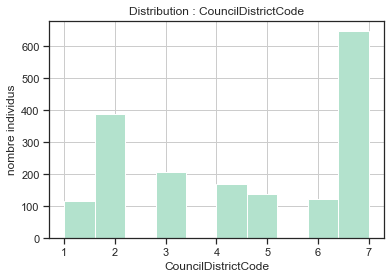

In [153]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['CouncilDistrictCode'].mean())
print("med:\n", df_joined_cleaned['CouncilDistrictCode'].median())
print("mod:\n", df_joined_cleaned['CouncilDistrictCode'].mode())
print("skw:\n", df_joined_cleaned['CouncilDistrictCode'].skew())
print("kur:\n", df_joined_cleaned['CouncilDistrictCode'].kurtosis())
df_joined_cleaned["CouncilDistrictCode"].hist() # Crée l'histogramme
ax.set_title("Distribution : CouncilDistrictCode")
ax.set_xlabel("CouncilDistrictCode")
ax.set_ylabel("nombre individus")
plt.savefig('CouncilDistrictCode.png')
plt.show() # Affiche l'histogramme

moy:
 6023789.209863283
med:
 1707536.0
mod:
 0          0.0
1    1167385.0
dtype: float64
skw:
 9.442413313000232
kur:
 140.53343707746677
max:
 284726322.0
min:
 0.0


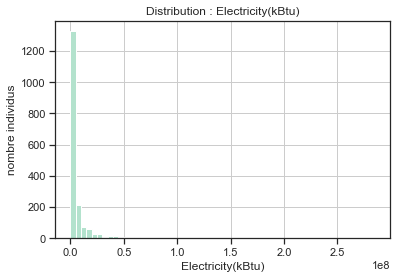

In [154]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['Electricity(kBtu)'].mean())
print("med:\n", df_joined_cleaned['Electricity(kBtu)'].median())
print("mod:\n", df_joined_cleaned['Electricity(kBtu)'].mode())
print("skw:\n", df_joined_cleaned['Electricity(kBtu)'].skew())
print("kur:\n", df_joined_cleaned['Electricity(kBtu)'].kurtosis())
print("max:\n", df_joined_cleaned['Electricity(kBtu)'].max())
print("min:\n", df_joined_cleaned['Electricity(kBtu)'].min())
max_Electricity = df_joined_cleaned['Electricity(kBtu)'].max()
binwidth = 50*10e4
df_joined_cleaned["Electricity(kBtu)"].hist(bins=np.arange(0, max_Electricity + binwidth, binwidth)) # Crée l'histogramme
ax.set_title("Distribution : Electricity(kBtu)")
ax.set_xlabel("Electricity(kBtu)")
ax.set_ylabel("nombre individus")
plt.savefig('Electricity(kBtu).png')
plt.show() # Affiche l'histogramme

moy:
 101062.53152436756
med:
 45164.5
mod:
 0    21600.0
dtype: float64
skw:
 4.642006504982908
kur:
 28.166955933386934


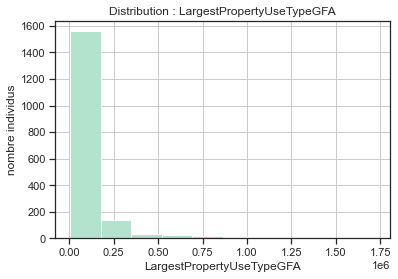

In [155]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['LargestPropertyUseTypeGFA'].mean())
print("med:\n", df_joined_cleaned['LargestPropertyUseTypeGFA'].median())
print("mod:\n", df_joined_cleaned['LargestPropertyUseTypeGFA'].mode())
print("skw:\n", df_joined_cleaned['LargestPropertyUseTypeGFA'].skew())
print("kur:\n", df_joined_cleaned['LargestPropertyUseTypeGFA'].kurtosis())
df_joined_cleaned["LargestPropertyUseTypeGFA"].hist() # Crée l'histogramme
ax.set_title("Distribution : LargestPropertyUseTypeGFA")
ax.set_xlabel("LargestPropertyUseTypeGFA")
ax.set_ylabel("nombre individus")
plt.savefig('LargestPropertyUseTypeGFA.png')
plt.show() # Affiche l'histogramme

moy:
 2005211.4047479536
med:
 512576.5
mod:
 0    0.0
dtype: float64
skw:
 21.899516189499554
kur:
 635.0671981948366


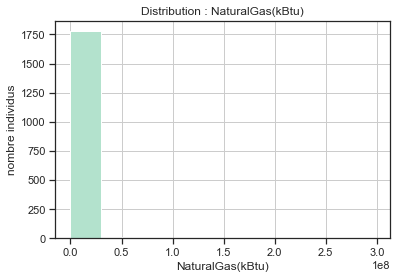

In [156]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['NaturalGas(kBtu)'].mean())
print("med:\n", df_joined_cleaned['NaturalGas(kBtu)'].median())
print("mod:\n", df_joined_cleaned['NaturalGas(kBtu)'].mode())
print("skw:\n", df_joined_cleaned['NaturalGas(kBtu)'].skew())
print("kur:\n", df_joined_cleaned['NaturalGas(kBtu)'].kurtosis())
df_joined_cleaned["NaturalGas(kBtu)"].hist() # Crée l'histogramme
ax.set_title("Distribution : NaturalGas(kBtu)")
ax.set_xlabel("NaturalGas(kBtu)")
ax.set_ylabel("nombre individus")
plt.savefig('NaturalGas(kBtu).png')
plt.show() # Affiche l'histogramme

moy:
 1.0859375
med:
 1.0
mod:
 0    1.0
dtype: float64
skw:
 13.30597775553312
kur:
 209.02634211321407


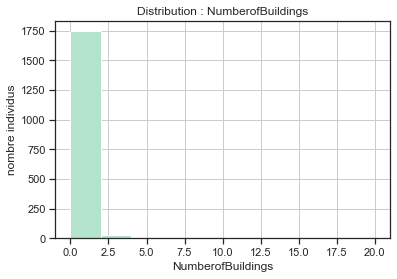

In [157]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['NumberofBuildings'].mean())
print("med:\n", df_joined_cleaned['NumberofBuildings'].median())
print("mod:\n", df_joined_cleaned['NumberofBuildings'].mode())
print("skw:\n", df_joined_cleaned['NumberofBuildings'].skew())
print("kur:\n", df_joined_cleaned['NumberofBuildings'].kurtosis())
df_joined_cleaned["NumberofBuildings"].hist() # Crée l'histogramme
ax.set_title("Distribution : NumberofBuildings")
ax.set_xlabel("NumberofBuildings")
ax.set_ylabel("nombre individus")
plt.savefig('NumberofBuildings.png')
plt.show() # Affiche l'histogramme

moy:
 4.704738653273809
med:
 3.0
mod:
 0    1.0
dtype: float64
skw:
 5.110609798772719
kur:
 36.25527205249481


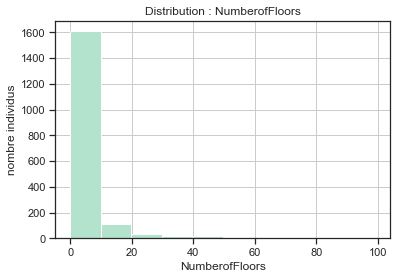

In [158]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['NumberofFloors'].mean())
print("med:\n", df_joined_cleaned['NumberofFloors'].median())
print("mod:\n", df_joined_cleaned['NumberofFloors'].mode())
print("skw:\n", df_joined_cleaned['NumberofFloors'].skew())
print("kur:\n", df_joined_cleaned['NumberofFloors'].kurtosis())
df_joined_cleaned["NumberofFloors"].hist() # Crée l'histogramme
ax.set_title("Distribution : NumberofFloors")
ax.set_xlabel("NumberofFloors")
ax.set_ylabel("nombre individus")
plt.savefig('NumberofFloors.png')
plt.show() # Affiche l'histogramme

moy:
 107914.9753720238
med:
 49250.5
mod:
 0    21600.0
dtype: float64
skw:
 4.923763395110461
kur:
 32.31633718608539


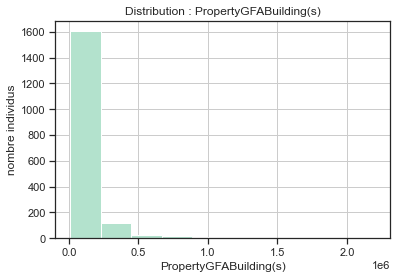

In [159]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['PropertyGFABuilding(s)'].mean())
print("med:\n", df_joined_cleaned['PropertyGFABuilding(s)'].median())
print("mod:\n", df_joined_cleaned['PropertyGFABuilding(s)'].mode())
print("skw:\n", df_joined_cleaned['PropertyGFABuilding(s)'].skew())
print("kur:\n", df_joined_cleaned['PropertyGFABuilding(s)'].kurtosis())
df_joined_cleaned["PropertyGFABuilding(s)"].hist() # Crée l'histogramme
ax.set_title("Distribution : PropertyGFABuilding(s)")
ax.set_xlabel("PropertyGFABuilding(s)")
ax.set_ylabel("nombre individus")
plt.savefig('PropertyGFABuilding(s).png')
plt.show() # Affiche l'histogramme

moy:
 15357.033435639882
med:
 0.0
mod:
 0    0.0
dtype: float64
skw:
 4.669373124668466
kur:
 28.08727603505999


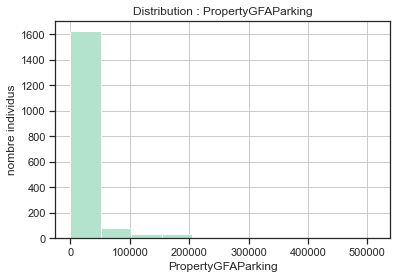

In [160]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['PropertyGFAParking'].mean())
print("med:\n", df_joined_cleaned['PropertyGFAParking'].median())
print("mod:\n", df_joined_cleaned['PropertyGFAParking'].mode())
print("skw:\n", df_joined_cleaned['PropertyGFAParking'].skew())
print("kur:\n", df_joined_cleaned['PropertyGFAParking'].kurtosis())
df_joined_cleaned["PropertyGFAParking"].hist() # Crée l'histogramme
ax.set_title("Distribution : PropertyGFAParking")
ax.set_xlabel("PropertyGFAParking")
ax.set_ylabel("nombre individus")
plt.savefig('PropertyGFAParking.png')
plt.show() # Affiche l'histogramme

moy:
 123272.00880766367
med:
 51258.0
mod:
 0    21600.0
dtype: float64
skw:
 4.525718718618512
kur:
 26.657390335288703


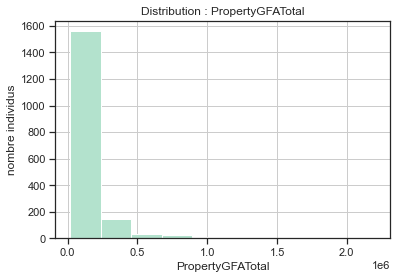

In [161]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['PropertyGFATotal'].mean())
print("med:\n", df_joined_cleaned['PropertyGFATotal'].median())
print("mod:\n", df_joined_cleaned['PropertyGFATotal'].mode())
print("skw:\n", df_joined_cleaned['PropertyGFATotal'].skew())
print("kur:\n", df_joined_cleaned['PropertyGFATotal'].kurtosis())
df_joined_cleaned["PropertyGFATotal"].hist() # Crée l'histogramme
ax.set_title("Distribution : PropertyGFATotal")
ax.set_xlabel("PropertyGFATotal")
ax.set_ylabel("nombre individus")
plt.savefig('PropertyGFATotal.png')
plt.show() # Affiche l'histogramme

moy:
 8500698.289004095
med:
 2612477.5625
mod:
 0    0.0
dtype: float64
skw:
 10.044091130442311
kur:
 145.4187565576383


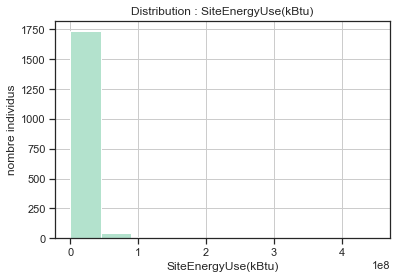

In [162]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['SiteEnergyUse(kBtu)'].mean())
print("med:\n", df_joined_cleaned['SiteEnergyUse(kBtu)'].median())
print("mod:\n", df_joined_cleaned['SiteEnergyUse(kBtu)'].mode())
print("skw:\n", df_joined_cleaned['SiteEnergyUse(kBtu)'].skew())
print("kur:\n", df_joined_cleaned['SiteEnergyUse(kBtu)'].kurtosis())
df_joined_cleaned["SiteEnergyUse(kBtu)"].hist() # Crée l'histogramme
ax.set_title("Distribution : SiteEnergyUse(kBtu)")
ax.set_xlabel("SiteEnergyUse(kBtu)")
ax.set_ylabel("nombre individus")
plt.savefig('SiteEnergyUse(kBtu).png')
plt.show() # Affiche l'histogramme

moy:
 175.8157222106726
med:
 132.1500015
mod:
 0    0.0
dtype: float64
skw:
 5.317829630004812
kur:
 46.77677012151075


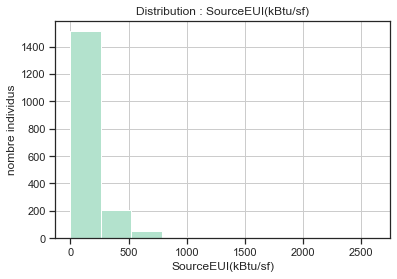

In [163]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['SourceEUI(kBtu/sf)'].mean())
print("med:\n", df_joined_cleaned['SourceEUI(kBtu/sf)'].median())
print("mod:\n", df_joined_cleaned['SourceEUI(kBtu/sf)'].mode())
print("skw:\n", df_joined_cleaned['SourceEUI(kBtu/sf)'].skew())
print("kur:\n", df_joined_cleaned['SourceEUI(kBtu/sf)'].kurtosis())
df_joined_cleaned["SourceEUI(kBtu/sf)"].hist() # Crée l'histogramme
ax.set_title("Distribution : SourceEUI(kBtu/sf)")
ax.set_xlabel("SourceEUI(kBtu/sf)")
ax.set_ylabel("nombre individus")
plt.savefig('SourceEUI(kBtu_per_sf).png')
plt.show() # Affiche l'histogramme

moy:
 450291.42075740604
med:
 0.0
mod:
 0    0.0
dtype: float64
skw:
 21.735065820132274
kur:
 567.3218756986762


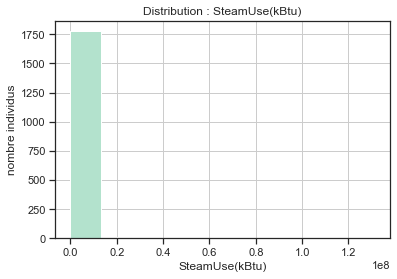

In [164]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['SteamUse(kBtu)'].mean())
print("med:\n", df_joined_cleaned['SteamUse(kBtu)'].median())
print("mod:\n", df_joined_cleaned['SteamUse(kBtu)'].mode())
print("skw:\n", df_joined_cleaned['SteamUse(kBtu)'].skew())
print("kur:\n", df_joined_cleaned['SteamUse(kBtu)'].kurtosis())
df_joined_cleaned["SteamUse(kBtu)"].hist() # Crée l'histogramme
ax.set_title("Distribution : SteamUse(kBtu)")
ax.set_xlabel("SteamUse(kBtu)")
ax.set_ylabel("nombre individus")
plt.savefig('SteamUse(kBtu).png')
plt.show() # Affiche l'histogramme

moy:
 183.2693870442708
med:
 53.8475
mod:
 0       0.000
1       0.240
2       0.790
3       1.560
4       3.620
5       3.730
6       3.860
7       6.860
8       9.145
9       9.585
10      9.820
11     13.910
12     15.270
13     15.500
14     16.630
15     17.665
16     17.790
17     19.070
18     21.105
19     22.660
20     23.660
21     27.690
22     33.350
23     36.205
24     50.405
25     51.670
26     66.290
27     67.970
28     71.060
29    119.030
30    249.430
dtype: float64
skw:
 15.329572931034798
max:
 16870.98
kur:
 0.0
min:
 315.5526657830182


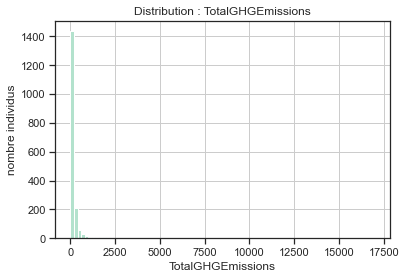

In [165]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['TotalGHGEmissions'].mean())
print("med:\n", df_joined_cleaned['TotalGHGEmissions'].median())
print("mod:\n", df_joined_cleaned['TotalGHGEmissions'].mode())
print("skw:\n", df_joined_cleaned['TotalGHGEmissions'].skew())
print("max:\n", df_joined_cleaned['TotalGHGEmissions'].max())
print("kur:\n", df_joined_cleaned['TotalGHGEmissions'].min())
print("min:\n", df_joined_cleaned['TotalGHGEmissions'].kurtosis())
max_Emissions = df_joined_cleaned['TotalGHGEmissions'].max()
binwidth = 200
df_joined_cleaned["TotalGHGEmissions"].hist(bins=np.arange(0, max_Emissions + binwidth, binwidth)) # Crée l'histogramme
ax.set_title("Distribution : TotalGHGEmissions")
ax.set_xlabel("TotalGHGEmissions")
ax.set_ylabel("nombre individus")
plt.savefig('TotalGHGEmissions.png')
plt.show() # Affiche l'histogramme

moy:
 1960.7707031250004
med:
 1964.6
mod:
 0    1900.0
dtype: float64
skw:
 -0.2538535168796863
kur:
 -1.0890153193702037


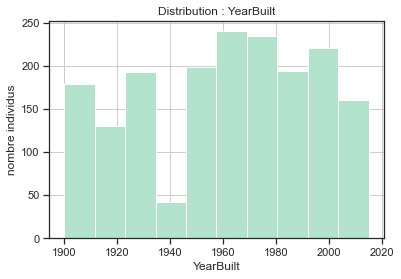

In [166]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['YearBuilt'].mean())
print("med:\n", df_joined_cleaned['YearBuilt'].median())
print("mod:\n", df_joined_cleaned['YearBuilt'].mode())
print("skw:\n", df_joined_cleaned['YearBuilt'].skew())
print("kur:\n", df_joined_cleaned['YearBuilt'].kurtosis())
df_joined_cleaned["YearBuilt"].hist() # Crée l'histogramme
ax.set_title("Distribution : YearBuilt")
ax.set_xlabel("YearBuilt")
ax.set_ylabel("nombre individus")
plt.savefig('YearBuilt.png')
plt.show() # Affiche l'histogramme

moy:
 59584.460119047624
med:
 58249.5
mod:
 0    58859.0
dtype: float64
skw:
 0.019309086583330713
kur:
 0.5067905014581258


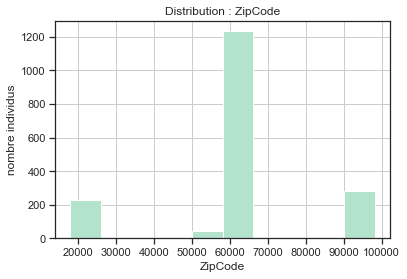

In [167]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['ZipCode'].mean())
print("med:\n", df_joined_cleaned['ZipCode'].median())
print("mod:\n", df_joined_cleaned['ZipCode'].mode())
print("skw:\n", df_joined_cleaned['ZipCode'].skew())
print("kur:\n", df_joined_cleaned['ZipCode'].kurtosis())
df_joined_cleaned["ZipCode"].hist() # Crée l'histogramme
ax.set_title("Distribution : ZipCode")
ax.set_xlabel("ZipCode")
ax.set_ylabel("nombre individus")
plt.savefig('ZipCode.png')
plt.show() # Affiche l'histogramme

moy:
 39404.47741268908
med:
 13124.0
mod:
 0    0.0
dtype: float64
skw:
 3.8246078323163295
kur:
 19.963850206245752


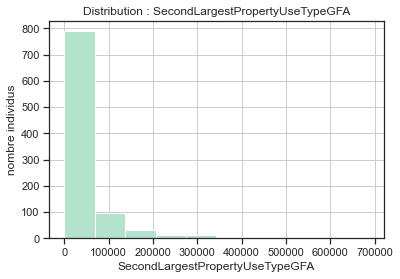

In [168]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['SecondLargestPropertyUseTypeGFA'].mean())
print("med:\n", df_joined_cleaned['SecondLargestPropertyUseTypeGFA'].median())
print("mod:\n", df_joined_cleaned['SecondLargestPropertyUseTypeGFA'].mode())
print("skw:\n", df_joined_cleaned['SecondLargestPropertyUseTypeGFA'].skew())
print("kur:\n", df_joined_cleaned['SecondLargestPropertyUseTypeGFA'].kurtosis())
df_joined_cleaned["SecondLargestPropertyUseTypeGFA"].hist() # Crée l'histogramme
ax.set_title("Distribution : SecondLargestPropertyUseTypeGFA")
ax.set_xlabel("SecondLargestPropertyUseTypeGFA")
ax.set_ylabel("nombre individus")
plt.savefig('SecondLargestPropertyUseTypeGFA.png')
plt.show() # Affiche l'histogramme

moy:
 14710.8141777102
med:
 6129.0
mod:
 0    0.0
dtype: float64
skw:
 7.881384666633747
kur:
 81.85695756958408


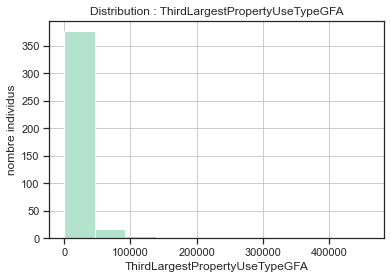

In [169]:
fig, ax = plt.subplots(1,1)
print("moy:\n", df_joined_cleaned['ThirdLargestPropertyUseTypeGFA'].mean())
print("med:\n", df_joined_cleaned['ThirdLargestPropertyUseTypeGFA'].median())
print("mod:\n", df_joined_cleaned['ThirdLargestPropertyUseTypeGFA'].mode())
print("skw:\n", df_joined_cleaned['ThirdLargestPropertyUseTypeGFA'].skew())
print("kur:\n", df_joined_cleaned['ThirdLargestPropertyUseTypeGFA'].kurtosis())
df_joined_cleaned["ThirdLargestPropertyUseTypeGFA"].hist() # Crée l'histogramme
ax.set_title("Distribution : ThirdLargestPropertyUseTypeGFA")
ax.set_xlabel("ThirdLargestPropertyUseTypeGFA")
ax.set_ylabel("nombre individus")
plt.savefig('ThirdLargestPropertyUseTypeGFA.png')
plt.show() # Affiche l'histogrammefig, ax = plt.subplots(1,1)

### 2.2. Analyse Bivariée

In [171]:
liste_variables_qualitatives = [
 'Building_Age',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'LargestPropertyUseTypeGFA',
 'NaturalGas(kBtu)',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEnergyUse(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SteamUse(kBtu)',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions']

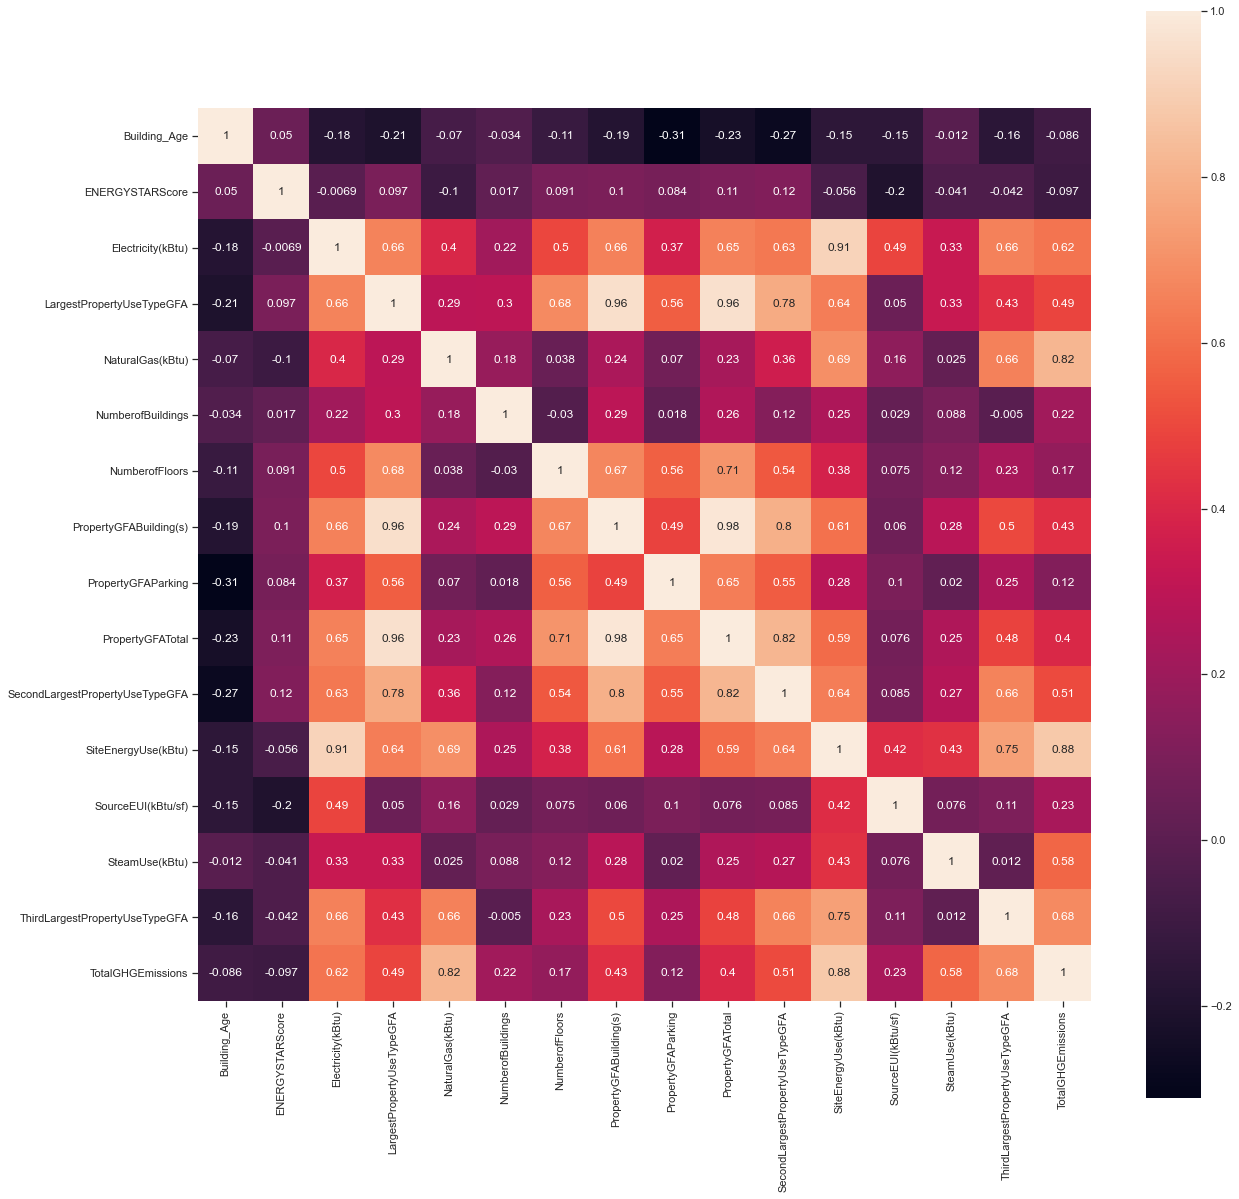

In [172]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_joined_cleaned[liste_variables_qualitatives].corr(),annot = True, square=True);

On constate que l'énergie consommée ('SiteEnergyUse(kBtu)') a une forte corrélation avec les variables suivantes :<br>
- R^2 = 0.96 : l'électricité consommée : Electricity(kBtu)<br>
- R^2 = 0.86 : Les émissions de CO2 : TotalGHGEmissions<br>
- R^2 = 0.84 : la surface de 1ère utilisation du bâtiment : LargestPropertyUseTypeGFA<br>
- R^2 = 0.82 : la surface du bâtiment : PropertyGFABuilding(s)<br>
- R^2 = 0.81 : la surface totale (bâtiment et parking) : PropertyGFATotal<br>
- R^2 = 0.75 : la surface de 3ème utilisation du bâtiment : ThirdLargestPropertyUseTypeGFA<br>
- R^2 = 0.72 : le nombre de bâtiments : Number of Buildings. Attention, la majorité des individus n'ont qu'un seul bâtiment.<br>
- R^2 = 0.65 : la surface de 2ème utilisation du bâtiment : SecondLargestPropertyUseTypeGFA<br>
<br>

On constate que les émissions de CO2 ('TotalGHGEmissions') a une forte corrélation avec les variables suivantes :<br>
- R^2 = 0.86 : l'énérgie consommée : SiteEnergyUse(kBtu)<br>
- R^2 = 0.73 : le gaz naturel consommé : NaturalGas(kBtu)(déjà comptée dans l'énérgie consommée : SiteEnergyUse(kBtu))<br>
- R^2 = 0.69 : l'électricité consommée : Electricity(kBtu)(déjà comptée dans l'énérgie consommée : SiteEnergyUse(kBtu))<br>
- R^2 = 0.68 : la vapeur consommée : SteamUse(kBtu)(déjà comptée dans l'énérgie consommée : SiteEnergyUse(kBtu))<br>
- R^2 = 0.68 : la surface de 3ème utilisation du bâtiment : ThirdLargestPropertyUseTypeGFA<br>
- R^2 = 0.58 : la surface de 1ère utilisation du bâtiment : LargestPropertyUseTypeGFA<br>
- R^2 = 0.54 : la surface du bâtiment : PropertyGFABuilding(s)<br>                                 
- R^2 = 0.53 : la surface de 2ème utilisation du bâtiment : SecondLargestPropertyUseTypeGFA<br>
- R^2 = 0.53 : la surface totale (bâtiment et parking) : PropertyGFATotal<br>

On note que l'ENERGY STAR Score est peu correlé avec les émissions de CO2 (idem pour la consommation d'énergie).

In [173]:
df_joined_cleaned.to_csv(r'/Users/moninechan/Documents/Openclassroom/DS/Projet_4/P4_jeu_de_donnees_nettoye.csv', header = True)